<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/bootcamp_team/deeplearning/%EB%BF%8C%EB%A6%AC_class_3%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dir = '/content/drive/MyDrive/'

In [7]:
name = os.listdir(dir)
name

['Colab Notebooks',
 'test_total_image',
 'total',
 'tree_test',
 'models',
 '7 classes model',
 '내 프로젝트.png',
 '뿌리 전체',
 '1_엑스레이',
 '3_뿌리_강조',
 '2_지면_위로_뿌리']

In [8]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '1_엑스레이'))
_2.append(os.listdir(dir +'2_지면_위로_뿌리'))
_3.append(os.listdir(dir + '3_뿌리_강조'))

In [9]:
total_list = []
total_list.append(os.listdir(dir + '1_엑스레이'))
total_list.append(os.listdir(dir +'2_지면_위로_뿌리'))
total_list.append(os.listdir(dir + '3_뿌리_강조'))
print(total_list)

[['뿌리128.png', '뿌리131.png', '전체766.PNG', '뿌리242.png', '뿌리243.png', '뿌리203.png', '뿌리204.png', '뿌리205.png', '뿌리206.png', '뿌리207.png', '뿌리208.png', '뿌리209.png', '뿌리210.png', '뿌리211.png', '뿌리212.png', '뿌리213.png', '뿌리214.png', '뿌리215.png', '뿌리216.png', '뿌리217.png', '뿌리218.png', '뿌리219.png', '뿌리220.png', '뿌리221.png', '뿌리222.png', '뿌리223.png', '뿌리224.png', '뿌리225.png', '뿌리226.png', '뿌리227.png', '뿌리228.png', '뿌리229.png', '뿌리230.png', '뿌리231.png', '뿌리232.png', '뿌리233.png', '뿌리234.png', '뿌리235.png', '뿌리236.png', '뿌리237.png', '뿌리238.png', '뿌리239.png', '뿌리240.png', '뿌리241.png', '뿌리244.png', '뿌리245.png', '뿌리246.png', '뿌리247.png', '뿌리248.png', '뿌리249.png', '뿌리250.png', '뿌리251.png', '뿌리252.png', '뿌리253.png', '뿌리254.png', '뿌리255.png', '뿌리256.png', '뿌리257.png', '뿌리258.png', '뿌리259.png', '뿌리260.png', '뿌리261.png', '뿌리262.png', '뿌리263.png', '뿌리264.png', '뿌리265.png', '뿌리26

In [10]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['뿌리128.png', '뿌리131.png', '전체766.PNG', '뿌리242.png', '뿌리243.png', '뿌리203.png', '뿌리204.png', '뿌리205.png', '뿌리206.png', '뿌리207.png', '뿌리208.png', '뿌리209.png', '뿌리210.png', '뿌리211.png', '뿌리212.png', '뿌리213.png', '뿌리214.png', '뿌리215.png', '뿌리216.png', '뿌리217.png', '뿌리218.png', '뿌리219.png', '뿌리220.png', '뿌리221.png', '뿌리222.png', '뿌리223.png', '뿌리224.png', '뿌리225.png', '뿌리226.png', '뿌리227.png', '뿌리228.png', '뿌리229.png', '뿌리230.png', '뿌리231.png', '뿌리232.png', '뿌리233.png', '뿌리234.png', '뿌리235.png', '뿌리236.png', '뿌리237.png', '뿌리238.png', '뿌리239.png', '뿌리240.png', '뿌리241.png', '뿌리244.png', '뿌리245.png', '뿌리246.png', '뿌리247.png', '뿌리248.png', '뿌리249.png', '뿌리250.png', '뿌리251.png', '뿌리252.png', '뿌리253.png', '뿌리254.png', '뿌리255.png', '뿌리256.png', '뿌리257.png', '뿌리258.png', '뿌리259.png', '뿌리260.png', '뿌리261.png', '뿌리262.png', '뿌리263.png', '뿌리264.png', '뿌리265.png', '뿌리266

In [11]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
_3 = np.concatenate(_3).tolist()

In [14]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [15]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
df3 = pd.DataFrame({
    '_3' : _3
})

In [16]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')

In [17]:
result = result.fillna(0)

In [18]:
result

,imgs,_1,_2,_3
0,뿌리128.png,뿌리128.png,0,0
1,뿌리131.png,뿌리131.png,0,0
2,전체766.PNG,전체766.PNG,0,0
3,뿌리242.png,뿌리242.png,0,0
4,뿌리243.png,뿌리243.png,0,0
...,...,...,...,...
275,뿌리189.png,0,0,뿌리189.png
276,뿌리190.png,0,0,뿌리190.png
277,뿌리191.png,0,0,뿌리191.png
278,뿌리192.png,0,0,뿌리192.png


In [20]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
result['_3'] = result['_3'].apply(binary)

In [21]:
result

,imgs,_1,_2,_3
0,뿌리128.png,1,0,0
1,뿌리131.png,1,0,0
2,전체766.PNG,1,0,0
3,뿌리242.png,1,0,0
4,뿌리243.png,1,0,0
...,...,...,...,...
275,뿌리189.png,0,0,1
276,뿌리190.png,0,0,1
277,뿌리191.png,0,0,1
278,뿌리192.png,0,0,1


In [22]:
result.columns = ['imgs','1_엑스레이', '2_지면_위로_뿌리','3_뿌리_강조']

In [23]:
result

,imgs,1_엑스레이,2_지면_위로_뿌리,3_뿌리_강조
0,뿌리128.png,1,0,0
1,뿌리131.png,1,0,0
2,전체766.PNG,1,0,0
3,뿌리242.png,1,0,0
4,뿌리243.png,1,0,0
...,...,...,...,...
275,뿌리189.png,0,0,1
276,뿌리190.png,0,0,1
277,뿌리191.png,0,0,1
278,뿌리192.png,0,0,1


In [24]:
def chage(data):
    if data == 1:
        data = 0
        return data
    else:
        data = 1
        return data
result['1_엑스레이'] = result['1_엑스레이'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [25]:
def chage2(data):
    if data == 1:
        data = 2
        return data
    else:
        data = 0
        return data
result['3_뿌리_강조'] = result['3_뿌리_강조'].apply(chage2)

In [41]:
result[213:]

,imgs,1_엑스레이,2_지면_위로_뿌리,3_뿌리_강조
213,뿌리201.png,1,1,0
214,뿌리8.png,1,0,2
215,뿌리5.png,1,0,2
216,뿌리4.png,1,0,2
217,뿌리9.png,1,0,2
...,...,...,...,...
275,뿌리189.png,1,0,2
276,뿌리190.png,1,0,2
277,뿌리191.png,1,0,2
278,뿌리192.png,1,0,2


In [42]:
data_1 = result.iloc[0:81]
data_1 = data_1[['imgs','1_엑스레이']]
data_1.columns = ['imgs','뿌리']

In [47]:
data_2 = result.iloc[81:214]
data_2 = data_2[['imgs','2_지면_위로_뿌리']]
data_2.columns = ['imgs','뿌리']

In [48]:
data_3 = result.iloc[214:]
data_3 = data_3[['imgs','3_뿌리_강조']]
data_3.columns = ['imgs','뿌리']

In [49]:
data_merge = pd.concat([data_1, data_2], axis = 0) 

In [50]:
data_merge2 = pd.concat([data_merge, data_3], axis = 0) 

In [52]:
data_merge2['뿌리'].value_counts()

1    133
0     81
2     66
Name: 뿌리, dtype: int64

In [53]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_merge2)

In [54]:
data_merge2_shuffled

,imgs,뿌리
61,뿌리261.png,0
231,뿌리57.png,2
122,뿌리62.png,1
58,뿌리258.png,0
272,뿌리182.png,2
...,...,...
233,뿌리60.png,2
176,뿌리140.png,1
20,뿌리218.png,0
171,뿌리130.png,1


In [55]:
data = data_merge2_shuffled

In [57]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['뿌리'])

In [58]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 224
Test  set rows: 56


In [59]:
IMAGE_PATH = '/content/drive/MyDrive/뿌리 전체/'

In [60]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [63]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['뿌리'], drop_first=False)
    return X, y

In [64]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [65]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(224, 300, 300, 3)
(224, 3)
(56, 300, 300, 3)
(56, 3)


In [66]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [67]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.6 MB/s eta 0:00:00


In [68]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [91]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

In [92]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(3, activation='softmax')(base_model.layers[-2].output)

In [93]:
model = Model(inputs=base_model.input, outputs=net)

In [94]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [95]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                           

In [96]:
%cd /content/drive/MyDrive/뿌리_models/
checkpoint_path = "/content/drive/MyDrive/뿌리_models/check_pointcp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

/content/drive/MyDrive/뿌리_models


In [97]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=10)
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=7*BATCH_SIZE)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=7,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping, cp_callback]
)

Epoch 1/50
26/26 [==============================] - 68s 321ms/step - loss: 0.6241 - accuracy: 0.7095 - val_loss: 71.8567 - val_accuracy: 0.4444
Epoch 2/50
22/26 [========================>.....] - ETA: 0s - loss: 0.4927 - accuracy: 0.8442
Epoch 2: saving model to /content/drive/MyDrive/뿌리_models/check_pointcp-0002.ckpt
26/26 [==============================] - 8s 302ms/step - loss: 0.4666 - accuracy: 0.8547 - val_loss: 68.7166 - val_accuracy: 0.4667
Epoch 3/50
26/26 [==============================] - 6s 223ms/step - loss: 0.2835 - accuracy: 0.9218 - val_loss: 4.0350 - val_accuracy: 0.4444
Epoch 4/50
19/26 [====================>.........] - ETA: 1s - loss: 0.3354 - accuracy: 0.8797
Epoch 4: saving model to /content/drive/MyDrive/뿌리_models/check_pointcp-0004.ckpt
26/26 [==============================] - 7s 285ms/step - loss: 0.3278 - accuracy: 0.8883 - val_loss: 0.7184 - val_accuracy: 0.8667
Epoch 5/50
26/26 [==============================] - 6s 222ms/step - loss: 0.1559 - accuracy: 0.9441

In [86]:
# import tensorflow as tf
# import numpy as np
# test = tf.constant(np.ones((200,200)))

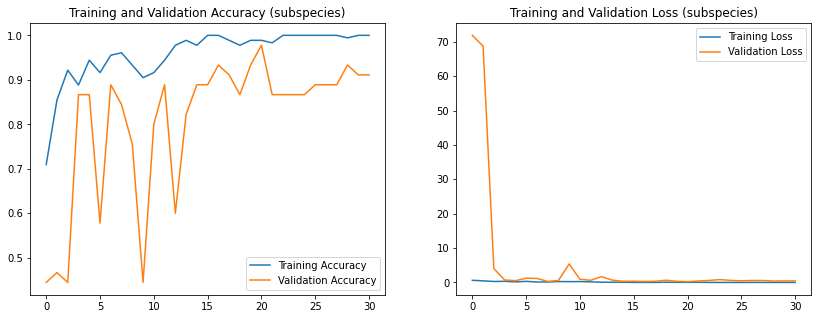

In [98]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [99]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 155ms/step - loss: 0.2176 - accuracy: 0.9464


[0.21760940551757812, 0.9464285969734192]

In [100]:
predictions = model.predict(X_test)

2/2 [==============================] - 3s 228ms/step


In [101]:
np.argmax(predictions[2])

1

In [102]:
y_test

,0,1,2
113,0,1,0
22,1,0,0
142,0,1,0
122,0,1,0
267,0,0,1
111,0,1,0
176,0,1,0
211,0,1,0
262,0,0,1
148,0,1,0


In [103]:

%cd /content/drive/MyDrive/뿌리_models//
from keras.models import load_model
model.save('뿌리_model.h5')

/content/drive/MyDrive/뿌리_models


1/1 [==============================] - 0s 51ms/step
2_지면_위로_뿌리 (0.964)
3_뿌리_강조 (0.0336)
1_엑스레이 (0.00256)
2/2 [==============================] - 0s 150ms/step - loss: 0.2176 - accuracy: 0.9464
Accuracy =  94.64285969734192 %


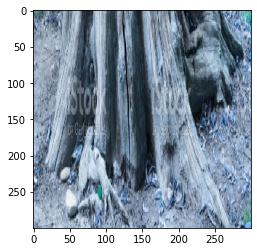

In [107]:
img = image.load_img('/content/drive/MyDrive/2_지면_위로_뿌리/뿌리1.png', target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(result.columns[1:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(3):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))


_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")